# Analisis discriminante lineal

Al final es un algoritmo de clasificacion genartivo!. Se basa en  la proyeccion de datos en una distribucion normal multivariada (distribucion normal pero para muchas variables).

En la distribucion normal simple se necesita la media ($\mu$) y la varianza ($\sigma$) de un conjunto de datos.
En la distribucion multivariada, se da un conjunto de medias (1 para cada variable que se quiera analizar) y una matriz de varianzas (donde la diagonal es la varianza de cada variable,
y el contenido de los triangulos son las covarianzas). Esta distribucion multivariada genera elipses en el espacio.

La media de la distribucion normal multivariada da cuenta del centro del plano.
La matriz de varianzas cambia la forma del plano de distribucion (mas angosto o mas ancho) y tambien su direccion (si es postitivo o negativo, etc)

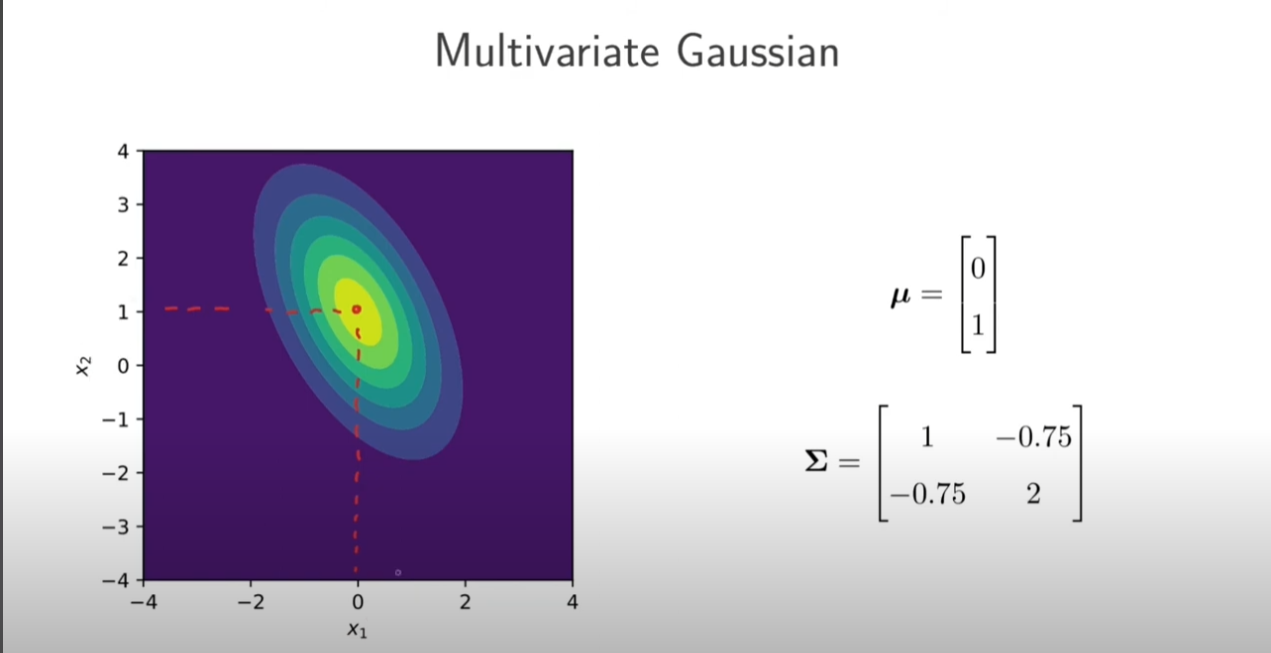

En el caso anterior, el conjunto de medias indica que el centro debiese estar en el punto (0, 1) (que asi se muestra). Ademas, se muestra que la covarianza es de -0.75, por lo que el corte
del plano da cuenta que va hacia abajo.

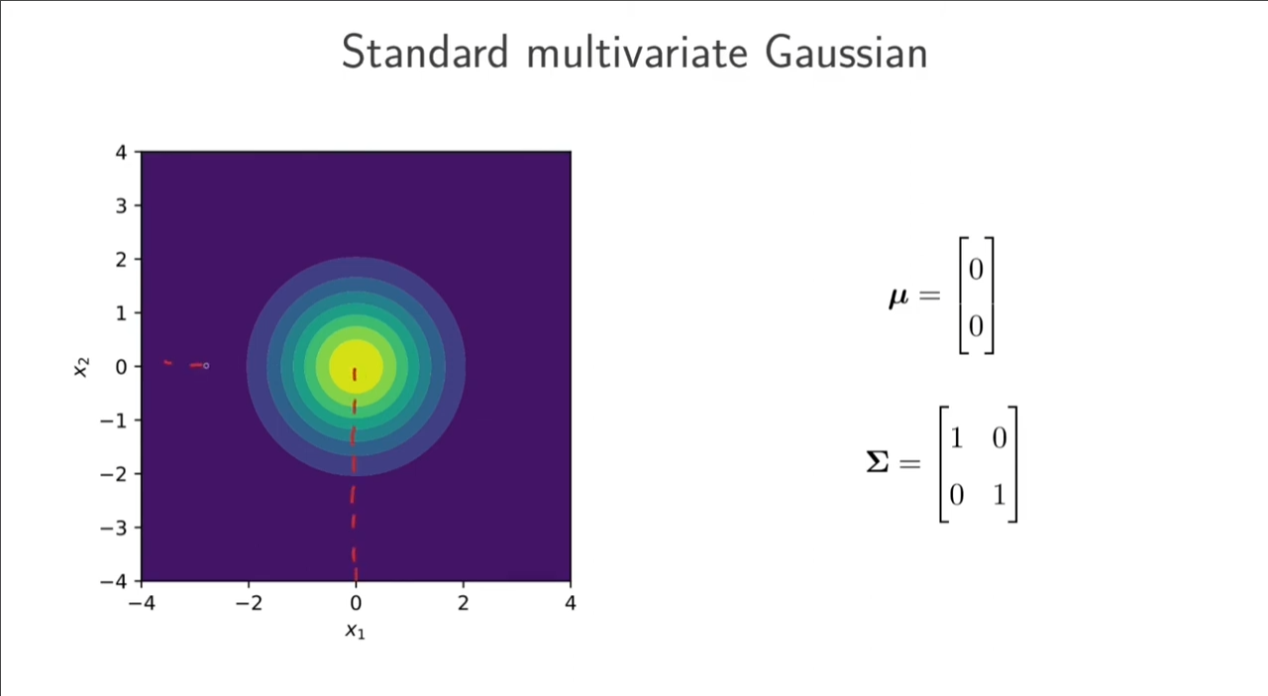

En el caso anterior, esta es la distribucion normal multivariada estandar. Esto, porque se tiene una media de (0, 0), y una covarianza de (0, 0).

En caso de que las covarianas sean iguales, entonces la forma del plano va a ser regular. Sin embargo, las covarianzas pueden ser distintas, y eso indicaria que el plano va a ser irreglar en uno de los ejes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('iris.csv').drop(columns='Unnamed: 0')

In [5]:
df.sample()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
42,4.4,3.2,1.3,0.2,setosa


Aqui queremos **identificar la especie** de una flor, basado en las medidas de largo y ancho de los sepalos y petalos.

In [6]:
X = df.drop(columns='Species')

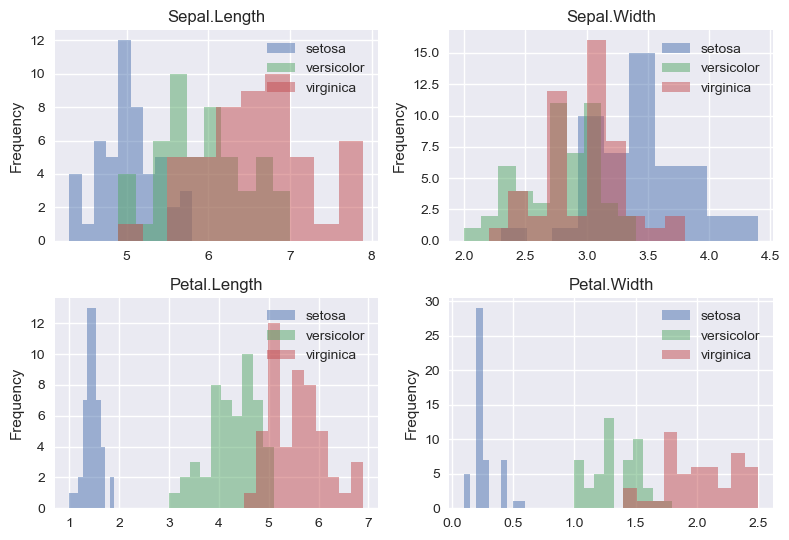

In [16]:
for n, i in enumerate(X.columns):
    plt.subplot(2, 2, n + 1)
    df.groupby('Species')[i].plot(kind='hist', alpha=0.5)
    plt.legend(df['Species'].unique())
    plt.title(i)
    plt.tight_layout()

# Al final en este grafico se esta viendo la distribucion de cada una de las variables del data set,
# para cada una de las especies de flores que hay

# Por lo tanto, al ver la variable Sepal.Length, se puede ver que hay una alta superposicion en los datos
# entre las flores versicolor y virginica. Esto es importante, ya que va a ser dificil discriminar
# entre especies de flores basado en esta variable.

# Al ver la variable Sepal.Width, nuevamente se puede ver una superposicion de los datos de cada clase.
# Esto significa que setosa, versicolor y virginica presentan largos de sepalos similares entre si. Por lo tanto,
# quizas sea una variable poco apta para hacer una discriminacion entre tipos de plantas

# Al ver las variables del petalo (largo y ancho), se puede ver una mejor separacion entre las clases.
# Esto estaria indicando que cada una de las clases presenta largos y anchos de petalos distintos entre si,
# lo que podria indicar que son buenas variables para poder identificar un tipo de planta.

# LDA

Con el analisis lineal discriminante, es posible separar (clasificar) diversos subgrupos de datos basados en fronteras para ciertas variables. Por ejemplo, en el caso anterior, se podria generar una frontera en la variable Petal.Length = 2, para poder diferenciar entre plantas setosa y versicolor/virginica. Tambien se podria ocupar un Petal.Width de 0.7, para separar setosa de versicolo/virginica y de 1.7 para separar virginica ded setosa/versicolor.

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [19]:
df['Species'].value_counts()

# Como son strings, debemos pasarlos a numeros para poder hacer un modelo de Machine Learning.

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [25]:
df['Species'] = LabelEncoder().fit_transform(df['Species'])

# Label Enconder permite hacer un encoding SOLAMENTE AL VECTOR OBJETIVO, con n cantidad de clases
# de la variable y.

In [26]:
X = df.drop(columns='Species')
y = df['Species']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11238)

In [34]:
# El Modelo presenta diversos hiperparametros que se pueden cambiar
# Esta prior, que es la probabilidad a priori
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [35]:
# Esto nos indica cual es la probabilidad de encontrar cada una de las flores a priori!
lda_model.priors_.round(2)

array([0.32, 0.35, 0.33])

In [37]:
# Esto nos da la media para cada una de las clases distintas de nuestro vector objetivo, y para cada
# variable!. De aqui se puede ver que el tipo de flor 0 tiene medias mucho mas separadas que las
# flores 1 y 2
lda_model.means_.round(2)

array([[5.08, 3.54, 1.47, 0.27],
       [5.96, 2.8 , 4.32, 1.35],
       [6.57, 2.96, 5.52, 2.05]])

<AxesSubplot:>

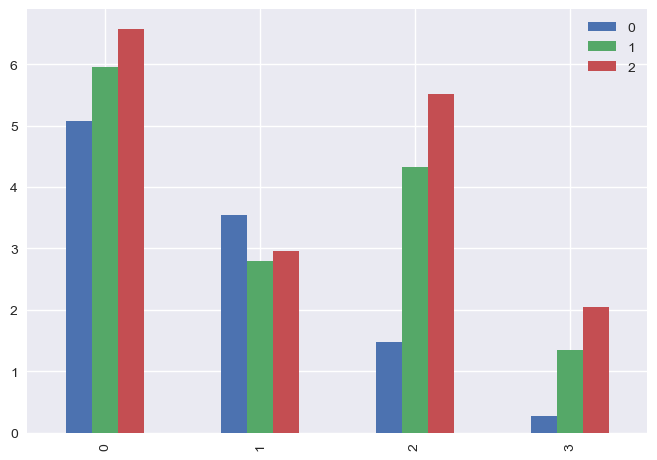

In [45]:
pd.DataFrame(lda_model.means_.round(2)).transpose().plot(kind='bar')
# Con el grafico se puede ver que en general la flor 0 esta mucho mas separada de las otras 2
# flores.

In [48]:
lda_model.coef_.round(2)

# Aqui se muestran los parametros utilizados para hacer cada una de las fronteras de decision!

array([[  6.01,  11.59, -14.97, -21.91],
       [ -1.83,  -3.71,   4.79,   1.83],
       [ -3.88,  -7.3 ,   9.43,  19.31]])

In [49]:
prediccion = lda_model.predict(X_test)

# Diagnostico de ALD (Analisis Lineal Discriminativo)

In [51]:
import lec4_graphs as afx

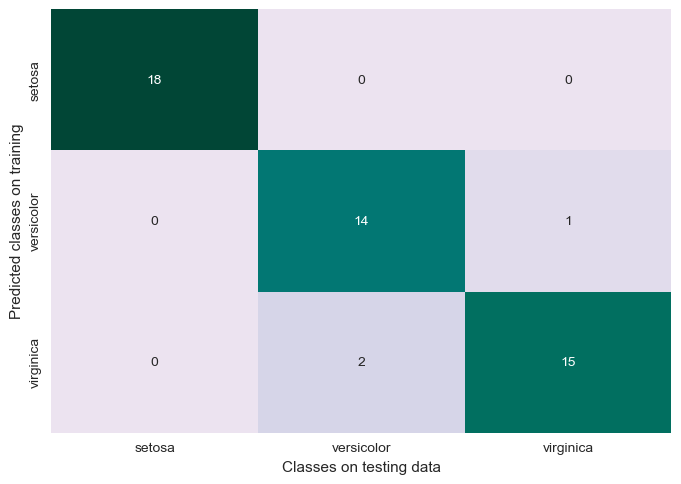

In [53]:
afx.plot_confusion_matrix(y_test, prediccion, ['setosa', 'versicolor', 'virginica'])

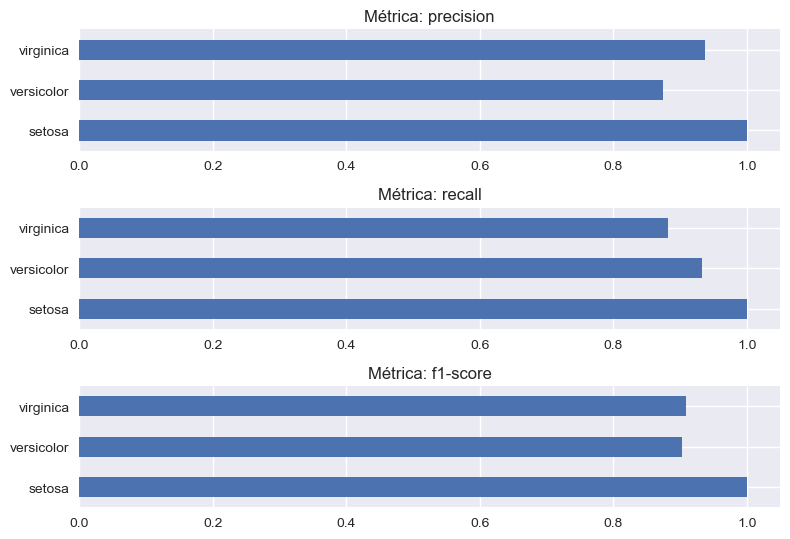

In [55]:
afx.plot_class_report(y_test, prediccion, ['setosa', 'versicolor', 'virginica'])

# Precision es la cantidad de Verdaderos Positivos, dentro de los realmente positivos (VP + FN). Esto es,
# cuantos verdaderos positivos realmente predijo el modelo
# Recall es la cantidad de Verdaderos Positivos, dentro de los que el modelo clasifico como positivos (VP + FP)
# F1 es la mezcla de los dos

# Aqui se puede ver que en precision, la clase versicolor es la que tiene el peor estadistico (el modelo predice
# el ~83% de los casos realmente que son versicolor)

# En recall, la clase virginica es la que tiene el peor estadistico. Esto significa que, dentro de la clase
# virginicas predichas, solo el ~ 84% son realmente virginicas.

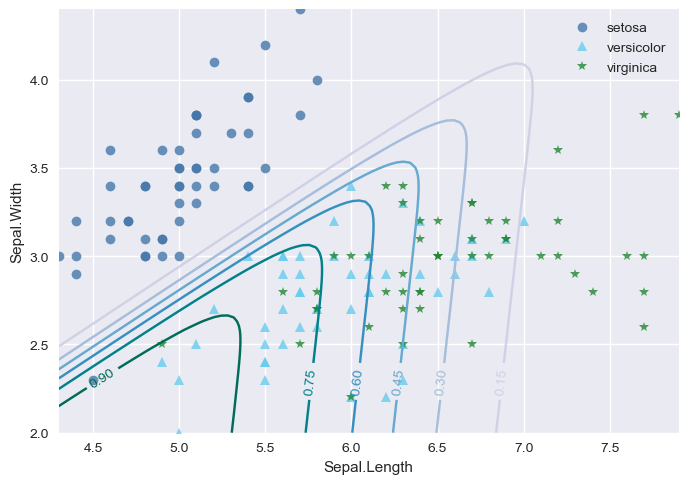

In [57]:
afx.probability_contours(LinearDiscriminantAnalysis(), X, y, 'Sepal.Length', 'Sepal.Width', ['setosa', 'versicolor', 'virginica'])

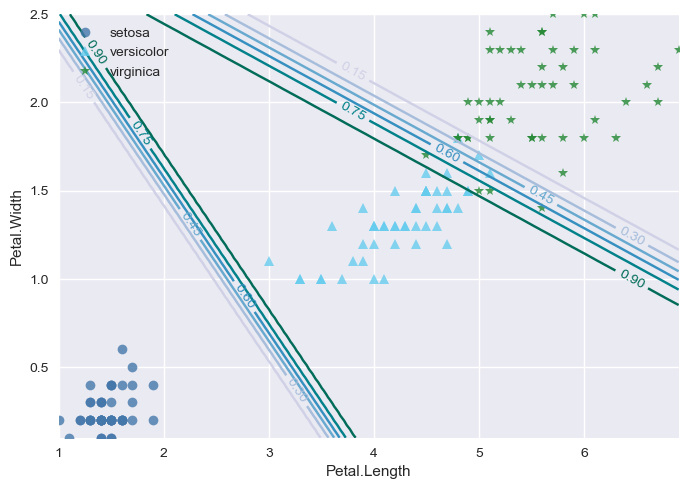

In [58]:
afx.probability_contours(LinearDiscriminantAnalysis(), X, y, 'Petal.Length', 'Petal.Width', ['setosa', 'versicolor', 'virginica'])

# Aqui se pueden ver las fronteras de decision que se utilizan para discriminar cada una de las clases!